# Smart Travel App 
## Notebook 2: Data Read In

##### Group 4, Project 4 
##### Team: Dominique Villarreal, Enrique Garcia, Jose Santos
##### Project Due Date: June 12, 2023

In [1]:
#pip install --upgrade tensorflow
#import tensorflow as tf
#print(tf.__version__)

In [2]:
import json
import os
import pandas as pd
import pprint as pp
import requests
import time
#from tensorflow.keras.models import load_model
#import warnings
#warnings.simplefilter("ignore")
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [4]:
# Import csv's & load df's
# Denver
merged_file_path = '/Users/dominiquevillarreal/Desktop/lastP/G4_Project4/Resources/df_Extractions/merged_df.csv'
merged_df = pd.read_csv(merged_file_path)

merged_df.head(2)

,categories,name,rating,review_count,location,coordinates,city
0,"['Festivals', 'Arts & Crafts', 'Local Flavor']",Jackalope Arts,5.0,8,"{'address1': '5738 Olde Wadsworth Blvd', 'addr...","{'latitude': 39.800724136818026, 'longitude': ...",Denver
1,"['Venues & Event Spaces', 'Party & Event Plann...",Special Occasions Events,5.0,4,"{'address1': '3550 Federal Blvd', 'address2': ...","{'latitude': 39.76623, 'longitude': -105.02439}",Denver


In [5]:
# Process & Organize merged_df
columns_to_delete = ['location', 'coordinates']
merged_df.drop(columns_to_delete, axis=1, inplace=True)

merged_df = merged_df[['city','name', 'rating', 
                       'review_count', 'categories']]

# Access and work with the updated DataFrame
merged_df.head(1)

,city,name,rating,review_count,categories
0,Denver,Jackalope Arts,5.0,8,"['Festivals', 'Arts & Crafts', 'Local Flavor']"


In [6]:
# City - One-hot encoding
#city_encoded_data = pd.get_dummies(merged_df, columns = ['city'])
#city_encoded_data

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19627 entries, 0 to 19626
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          19627 non-null  object 
 1   name          19627 non-null  object 
 2   rating        19627 non-null  float64
 3   review_count  19627 non-null  int64  
 4   categories    19627 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 766.8+ KB


In [7]:
# Create encoded df
city_encoded_data = merged_df.copy()
city_encoded_data

,city,name,rating,review_count,categories
0,Denver,Jackalope Arts,5.0,8,"['Festivals', 'Arts & Crafts', 'Local Flavor']"
1,Denver,Special Occasions Events,5.0,4,"['Venues & Event Spaces', 'Party & Event Plann..."
2,Denver,Denver International Wine Festival,4.5,6,['Festivals']
3,Denver,"Denver Mineral, Fossil, Gem & Jewelry Show",4.5,10,['Festivals']
4,Denver,Colorado Festival of Horror,5.0,1,['Festivals']
...,...,...,...,...,...
19622,NewYork,Felice 56,4.0,94,"['Italian', 'Wine Bars']"
19623,NewYork,The Jeffrey Craft Beer & Bites,4.0,728,"['Bars', 'American (New)', 'Coffee & Tea']"
19624,NewYork,Saint Tuesday,4.0,30,"['Lounges', 'Speakeasies', 'Cocktail Bars']"
19625,NewYork,Harlem Nights Bar,4.0,185,"['Bars', 'Music Venues']"


In [8]:
# Explode the 'categories' column
city_encoded_data['categories'] = city_encoded_data['categories'].apply(eval)
city_encoded_data = city_encoded_data.explode('categories')
city_encoded_data

,city,name,rating,review_count,categories
0,Denver,Jackalope Arts,5.0,8,Festivals
0,Denver,Jackalope Arts,5.0,8,Arts & Crafts
0,Denver,Jackalope Arts,5.0,8,Local Flavor
1,Denver,Special Occasions Events,5.0,4,Venues & Event Spaces
1,Denver,Special Occasions Events,5.0,4,Party & Event Planning
...,...,...,...,...,...
19625,NewYork,Harlem Nights Bar,4.0,185,Bars
19625,NewYork,Harlem Nights Bar,4.0,185,Music Venues
19626,NewYork,Cardiff Giant,4.0,56,Bars
19626,NewYork,Cardiff Giant,4.0,56,"Beer, Wine & Spirits"


In [15]:
city_categories= city_encoded_data.groupby('city')['categories'].unique()

denver_categories = city_categories['Denver']

newyork_categories = city_categories['NewYork']

miami_categories = city_categories['Miami']

#print("Unique categories for Denver:", denver_categories)



In [16]:
# Assuming your DataFrame is named "data"
unique_categories = {'Denver': set(), 'NewYork': set(), 'Miami': set()}

# Iterate over the rows
for index, row in city_encoded_data.iterrows():
    city = row['city']
    category = row['categories']
    unique_categories[city].add(category)

# Print the unique categories for each city
print("Unique categories for Denver:", unique_categories['Denver'])


Unique categories for Denver: {'Street Vendors', 'Thai', 'Meaderies', 'Toy Stores', 'Cheese Shops', 'Cosmetics & Beauty Supply', 'Ayurveda', 'Hypnosis/Hypnotherapy', 'Poke', 'Bed & Breakfast', 'Recording & Rehearsal Studios', 'Tennis', 'Dim Sum', 'Coffee Roasteries', 'Motorcycle Rental', 'Steakhouses', 'Modern European', 'Themed Cafes', 'Art Tours', 'Dance Studios', 'Gay Bars', 'Shopping Centers', 'Pet Adoption', 'Horse Boarding', 'Sandwiches', 'Polynesian', 'Furniture Stores', 'Veterans Organizations', 'Hobby Shops', 'Magicians', 'Accessories', 'Travel Services', 'Vinyl Records', 'Pumpkin Patches', 'Glass Blowing', 'Turkish', 'Art Space Rentals', 'Psychic Mediums', 'Tex-Mex', 'Counseling & Mental Health', 'Chicken Wings', 'Pick Your Own Farms', 'Stadiums & Arenas', 'Cafes', 'Civic Center', 'Food Court', 'Retirement Homes', 'Appraisal Services', 'Rock Climbing', 'Trampoline Parks', 'Beer, Wine & Spirits', 'Bagels', 'Professional Sports Teams', 'Gift Shops', 'Delis', 'Ticket Sales', 'Am

In [17]:
print("Unique categories for New York:", unique_categories['NewYork'])

Unique categories for New York: {nan, 'Thai', 'Street Vendors', 'Toy Stores', 'Cheese Shops', 'Cosmetics & Beauty Supply', 'Poke', 'Bed & Breakfast', 'Motorcycle Repair', 'Wine Tasting Classes', 'Sicilian', 'Recording & Rehearsal Studios', 'Tennis', 'Dim Sum', 'Japanese Curry', 'Coffee Roasteries', 'Steakhouses', 'Gay Bars', 'Modern European', 'Shopping Centers', 'Dance Studios', 'Art Tours', 'Town Car Service', 'Pedicabs', 'Sandwiches', 'LAN Centers', 'Pop-up Shops', 'Magicians', 'Party Equipment Rentals', 'Accessories', 'Laundromat', 'Travel Services', 'Club Crawl', 'Turkish', 'Art Space Rentals', 'Boat Tours', 'Tex-Mex', 'Counseling & Mental Health', 'Chicken Wings', 'Cafes', 'Food Court', 'Rock Climbing', 'Beer, Wine & Spirits', 'Bagels', 'Educational Services', 'Hainan', 'Arabic', 'Delis', 'Cabaret', 'Ticket Sales', 'Amateur Sports Teams', 'Specialty Schools', 'Do-It-Yourself Food', 'Printing Services', 'Shaved Ice', 'Bubble Tea', 'Chicken Shop', 'French', 'Batting Cages', 'Hawaii

In [18]:
print("Unique categories for Miami:", unique_categories['Miami'])

Unique categories for Miami: {'Ayurveda', 'Street Vendors', 'Toy Stores', 'Thai', 'Cheese Shops', 'Hypnosis/Hypnotherapy', 'Vacation Rentals', 'Poke', 'Bed & Breakfast', 'Motorcycle Repair', 'Wine Tasting Classes', 'Recording & Rehearsal Studios', 'Tennis', 'Dim Sum', 'Motorcycle Rental', 'Steakhouses', 'Art Tours', 'Modern European', 'Gay Bars', 'Dance Studios', 'Town Car Service', 'Horse Boarding', 'Animal Shelters', 'Sandwiches', 'Medical Spas', 'Skydiving', 'Veterans Organizations', 'LAN Centers', 'Pop-up Shops', 'Magicians', 'Party Equipment Rentals', 'Travel Services', 'Vinyl Records', 'Glass Blowing', 'Art Space Rentals', 'Turkish', 'Boat Tours', 'Psychic Mediums', 'Videographers', 'Tex-Mex', 'Counseling & Mental Health', 'Chicken Wings', 'Pick Your Own Farms', 'Stadiums & Arenas', 'Cafes', 'Bubble Soccer', 'Food Court', 'Retirement Homes', 'Lighting Stores', 'Rock Climbing', 'Trampoline Parks', 'Beer, Wine & Spirits', 'Bagels', 'Professional Sports Teams', 'Educational Services

In [19]:
unique_category_count = merged_df["categories"].nunique()
print(unique_category_count)

5548


In [114]:
# Categories - labelEncoder
# Create a label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'categories' column
city_encoded_data['categories_encoded'] = label_encoder.fit_transform(city_encoded_data['categories'])

city_encoded_data

,city,name,rating,review_count,categories,categories_encoded
0,Denver,Jackalope Arts,5.0,8,Festivals,220
0,Denver,Jackalope Arts,5.0,8,Arts & Crafts,38
0,Denver,Jackalope Arts,5.0,8,Local Flavor,348
1,Denver,Special Occasions Events,5.0,4,Venues & Event Spaces,605
1,Denver,Special Occasions Events,5.0,4,Party & Event Planning,416
...,...,...,...,...,...,...
19625,NewYork,Harlem Nights Bar,4.0,185,Bars,58
19625,NewYork,Harlem Nights Bar,4.0,185,Music Venues,384
19626,NewYork,Cardiff Giant,4.0,56,Bars,58
19626,NewYork,Cardiff Giant,4.0,56,"Beer, Wine & Spirits",70


In [115]:
# Drop original categories column
city_encoded_data.drop('categories', axis=1, inplace=True)

In [116]:
city_encoded_data

,city,name,rating,review_count,categories_encoded
0,Denver,Jackalope Arts,5.0,8,220
0,Denver,Jackalope Arts,5.0,8,38
0,Denver,Jackalope Arts,5.0,8,348
1,Denver,Special Occasions Events,5.0,4,605
1,Denver,Special Occasions Events,5.0,4,416
...,...,...,...,...,...
19625,NewYork,Harlem Nights Bar,4.0,185,58
19625,NewYork,Harlem Nights Bar,4.0,185,384
19626,NewYork,Cardiff Giant,4.0,56,58
19626,NewYork,Cardiff Giant,4.0,56,70


In [126]:
# Create the city_encoded_df
city_encoded_df = city_encoded_data[['city', 'categories_encoded']]
city_encoded_df

,city,categories_encoded
0,Denver,220
0,Denver,38
0,Denver,348
1,Denver,605
1,Denver,416
...,...,...
19625,NewYork,58
19625,NewYork,384
19626,NewYork,58
19626,NewYork,70


In [118]:
# Set the city column as index
#city_encoded_df = city_encoded_df.set_index("city")
#city_encoded_df.head(25)

In [47]:
# Create the experiences_encoded_df
exp_encoded_df = city_encoded_data[['name', 'rating', 'review_count', 'categories_encoded', 'city']]
exp_encoded_df

,name,rating,review_count,categories_encoded,city
0,Jackalope Arts,5.0,8,220,Denver
0,Jackalope Arts,5.0,8,38,Denver
0,Jackalope Arts,5.0,8,348,Denver
1,Special Occasions Events,5.0,4,605,Denver
1,Special Occasions Events,5.0,4,416,Denver
...,...,...,...,...,...
19625,Harlem Nights Bar,4.0,185,58,NewYork
19625,Harlem Nights Bar,4.0,185,384,NewYork
19626,Cardiff Giant,4.0,56,58,NewYork
19626,Cardiff Giant,4.0,56,70,NewYork


In [48]:
# Set the name column as index
exp_encoded_df = exp_encoded_df.set_index("name")
exp_encoded_df

,rating,review_count,categories_encoded,city
name,,,,
Jackalope Arts,5.0,8,220,Denver
Jackalope Arts,5.0,8,38,Denver
Jackalope Arts,5.0,8,348,Denver
Special Occasions Events,5.0,4,605,Denver
Special Occasions Events,5.0,4,416,Denver
...,...,...,...,...
Harlem Nights Bar,4.0,185,58,NewYork
Harlem Nights Bar,4.0,185,384,NewYork
Cardiff Giant,4.0,56,58,NewYork


In [49]:
# City - One-hot encoding
exp_encoded_df = pd.get_dummies(exp_encoded_df, columns = ['city'])
exp_encoded_df

,rating,review_count,categories_encoded,city_Denver,city_Miami,city_NewYork
name,,,,,,
Jackalope Arts,5.0,8,220,1,0,0
Jackalope Arts,5.0,8,38,1,0,0
Jackalope Arts,5.0,8,348,1,0,0
Special Occasions Events,5.0,4,605,1,0,0
Special Occasions Events,5.0,4,416,1,0,0
...,...,...,...,...,...,...
Harlem Nights Bar,4.0,185,58,0,0,1
Harlem Nights Bar,4.0,185,384,0,0,1
Cardiff Giant,4.0,56,58,0,0,1


In [50]:
#  Prepare the data. Use the StandardScaler module and fit_transform function to 
# scale all columns with numerical values
exp_encoded_df[['rating', 'review_count']] = StandardScaler().fit_transform(exp_encoded_df[["rating", "review_count"]])

# Diplay the first five rows of the scaled data
exp_encoded_df

,rating,review_count,categories_encoded,city_Denver,city_Miami,city_NewYork
name,,,,,,
Jackalope Arts,1.079626,-0.487658,220,1,0,0
Jackalope Arts,1.079626,-0.487658,38,1,0,0
Jackalope Arts,1.079626,-0.487658,348,1,0,0
Special Occasions Events,1.079626,-0.499555,605,1,0,0
Special Occasions Events,1.079626,-0.499555,416,1,0,0
...,...,...,...,...,...,...
Harlem Nights Bar,-0.222000,0.038811,58,0,0,1
Harlem Nights Bar,-0.222000,0.038811,384,0,0,1
Cardiff Giant,-0.222000,-0.344886,58,0,0,1


In [52]:
# Initialize the K-Means model with n_clusters=3
model = KMeans(n_clusters=3)

In [53]:
# Fit the model for the df_stocks_scaled DataFrame
model.fit(city_encoded_df)

KMeans(n_clusters=3)

In [54]:
# Predict the model segments (clusters)
city_category_clusters = model.predict(city_encoded_df)

# View the stock segments
print(city_category_clusters)

[2 1 2 ... 1 1 1]


In [56]:
# Create a copy of the concatenated DataFrame
city_encoded_df_predictions = city_encoded_df.copy()

In [58]:
# Create a new column in the copy of the concatenated DataFrame with the predicted clusters
city_encoded_df_predictions["CityCluster"] = city_category_clusters

# Review the DataFrame
city_encoded_df_predictions

,categories_encoded,CityCluster
city,,
Denver,220,2
Denver,38,1
Denver,348,2
Denver,605,0
Denver,416,2
...,...,...
NewYork,58,1
NewYork,384,2
NewYork,58,1


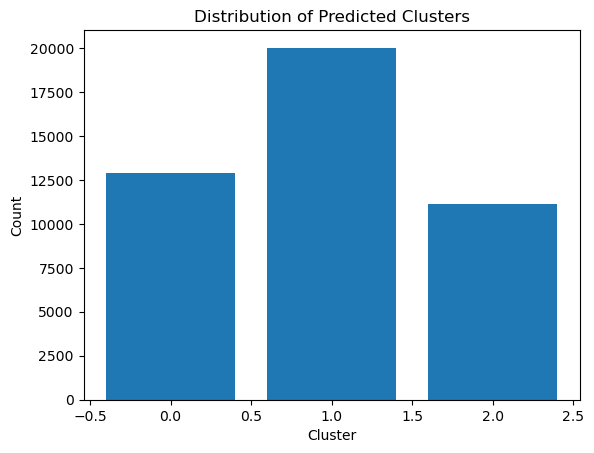

In [59]:
import matplotlib.pyplot as plt

# Count the occurrences of each predicted cluster
cluster_counts = city_encoded_df_predictions["CityCluster"].value_counts()

# Create a bar plot
plt.bar(cluster_counts.index, cluster_counts.values)

# Set the labels and title
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.title("Distribution of Predicted Clusters")

# Display the plot
plt.show()


In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming your DataFrame is named 'df'
#city_encoded_df = city_encoded_df.reset_index()

# Separate the input features (X) and the target variable (y)
X = city_encoded_df['categories_encoded'].values.reshape(-1, 1) 
y = city_encoded_df['city']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model's performance
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.3709384230856623


In [91]:
# based on tree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split the data into input features (X) and target variable (y)
X = city_encoded_df['categories_encoded'].values.reshape(-1, 1)
y = city_encoded_df.index.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.0


In [93]:
# random forest

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into input features (X) and target variable (y)
X = city_encoded_df['categories_encoded'].values.reshape(-1, 1)
y = city_encoded_df.index.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
clf = RandomForestClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.0


In [100]:
#plotting linear regression model 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate and true positive rate
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Calculate the area under the ROC curve
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Plot the decision boundary
if X_train.shape[1] == 2:  # Only plot if there are 2 features
    # Create a mesh grid of points
    h = 0.01  # Step size of the mesh
    x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
    y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the class for each point in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the training examples
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()


ValueError: multiclass format is not supported

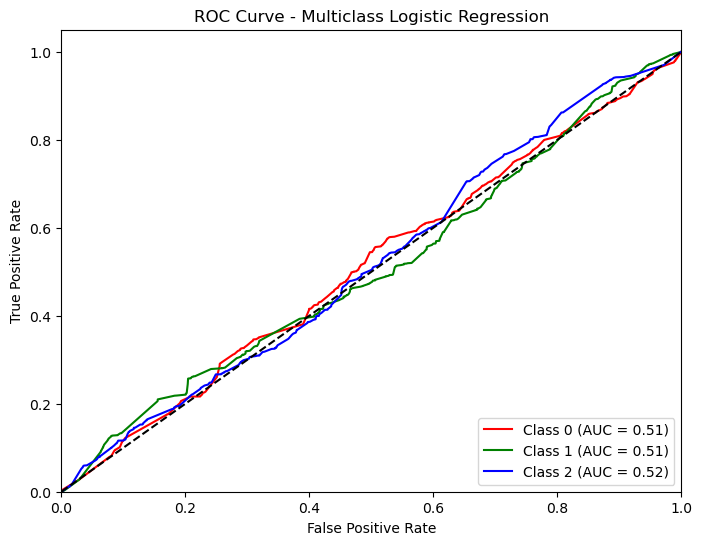

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Convert the target variable to binary format
y_binary = label_binarize(y, classes=np.unique(y))

# Train separate logistic regression models for each class
n_classes = y_binary.shape[1]
models = []
for i in range(n_classes):
    model = LogisticRegression()
    model.fit(X, y_binary[:, i])
    models.append(model)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    y_pred_proba = models[i].predict_proba(X)[:, 1]
    fpr[i], tpr[i], _ = roc_curve(y_binary[:, i], y_pred_proba)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = cycle(['red', 'green', 'blue'])  # Use different colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multiclass Logistic Regression')
plt.legend(loc='lower right')
plt.show()


In [106]:
city_encoded_df

,level_0,index,city,categories_encoded
0,0,0,Denver,220
1,1,1,Denver,38
2,2,2,Denver,348
3,3,3,Denver,605
4,4,4,Denver,416
...,...,...,...,...
44004,44004,44004,NewYork,58
44005,44005,44005,NewYork,384
44006,44006,44006,NewYork,58
44007,44007,44007,NewYork,70


In [137]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
import random

# Assuming your DataFrame is named "city_encoded_df"
unique_cities = city_encoded_df['city'].unique()
predicted_cities = []

# Create an empty DataFrame to store the results
predicted_cities_df = pd.DataFrame(columns=['Categories Sample', 'Predicted City'])

# Convert the categories to numerical values using ordinal encoding
ordinal_encoder = OrdinalEncoder()
all_categories_encoded = ordinal_encoder.fit_transform(city_encoded_df['categories_encoded'].values.reshape(-1, 1))

# Encode the target variable (city names)
label_encoder = LabelEncoder()
encoded_cities = label_encoder.fit_transform(city_encoded_df['city'])

# Create and train the linear regression model using all_categories
model = LinearRegression()
model.fit(all_categories_encoded, encoded_cities)

# Loop until each unique city is predicted or three samples are saved
while len(predicted_cities) < len(unique_cities) and len(predicted_cities_df) < 3:
    # Generate a new random sample
    categories_sample = random.sample(list(city_encoded_df['categories_encoded']), 25)
    sampled_categories_encoded = ordinal_encoder.transform([[category] for category in categories_sample])

    # Make prediction using the sampled categories
    sampled_categories_encoded = sampled_categories_encoded.reshape(-1, 1)  # Reshape to (-1, 1)
    prediction = model.predict(sampled_categories_encoded)
    predicted_city_encoded = int(prediction[0])
    predicted_city = label_encoder.inverse_transform([predicted_city_encoded])[0]

    # Check if the predicted city has already been predicted
    if predicted_city not in predicted_cities:
        # Add the predicted city to the list and DataFrame
        predicted_cities.append(predicted_city)
        predicted_cities_df = predicted_cities_df.append({'Categories Sample': categories_sample, 'Predicted City': predicted_city}, ignore_index=True)

# Print the DataFrame with the predicted cities
print(predicted_cities_df)





KeyboardInterrupt: 

In [108]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assuming your DataFrame is named "city_encoded_data" and the sampled categories are stored in "categories_sample"
sampled_categories = city_encoded_data[[str(category) for category in categories_sample]]
all_categories = city_encoded_data['categories']
y = city_encoded_data['city']

# Create and train the linear regression model using all_categories
model = LinearRegression()
model.fit(all_categories, y)

# Make predictions using the sampled categories
predictions = model.predict(sampled_categories)

# Print the predicted cities based on the sampled categories
predicted_cities = pd.DataFrame({'Categories Sample': categories_sample, 'Predicted City': predictions})
print(predicted_cities)


KeyError: "None of [Index(['431', '95', '636', '96', '70', '502', '128', '370', '187', '483',\n       '155', '16', '58', '494', '406', '349', '447', '176', '370', '217',\n       '601', '381', '349', '96', '486'],\n      dtype='object')] are in the [columns]"